引用程式庫

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from wordcloud import WordCloud, STOPWORDS

In [24]:
df_sms = pd.read_csv('spam.csv',encoding='latin-1')
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df_sms['Labeling']= df_sms['label'].map({'ham': 1, 'spam':0})
df_sms.head()

,label,sms,Labeling
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [27]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()

,label,sms,Labeling,length
0,ham,"Go until jurong point, crazy.. Available only ...",1,111
1,ham,Ok lar... Joking wif u oni...,1,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155
3,ham,U dun say so early hor... U c already then say...,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,61


<Axes: ylabel='Frequency'>

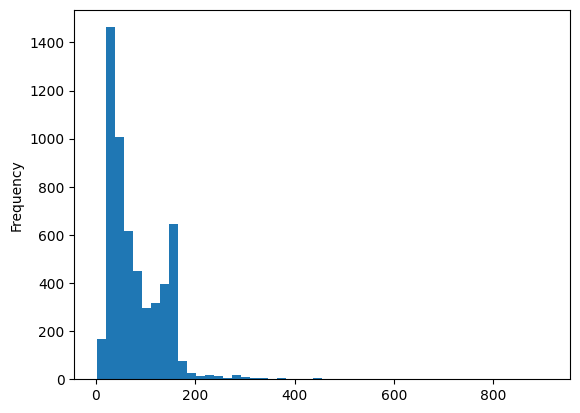

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df_sms['length'].plot(bins=50, kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

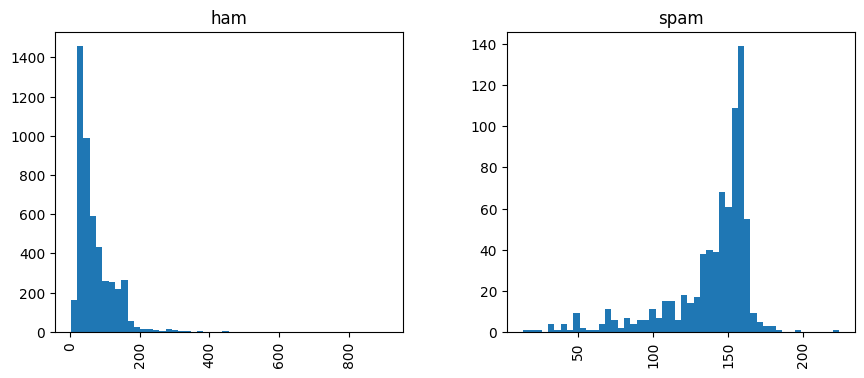

In [29]:
df_sms.hist(column='length', by='label', bins=50,figsize=(10,4))

In [30]:
X = df_sms['sms']
Y = df_sms['Labeling']

from sklearn.model_selection import train_test_split as tt
X_train, X_test, Y_train, Y_test = tt(X, Y,test_size=0.25, random_state=100)
X_traino=X_train
X_trainlist=X_traino.tolist()
X_testo=X_test
X_testlist=X_testo.tolist()
Y_traino=Y_train
Y_testo=Y_test
Y_trainlist=Y_traino.tolist()
Y_testlist=Y_testo.tolist()

In [31]:
X_train.shape

(4179,)

In [32]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object


In [33]:
X_test.shape

(1393,)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(stop_words ='english')
vector.fit(X_train)

CountVectorizer(stop_words='english')

In [35]:
vector.vocabulary_

{'know': 3758,
 'grumpy': 3098,
 'old': 4665,
 'people': 4853,
 'mom': 4335,
 'like': 3905,
 'better': 1264,
 'lying': 4059,
 'play': 4947,
 'jokes': 3643,
 'set': 5693,
 'place': 4933,
 'heart': 3208,
 'mind': 4261,
 'easily': 2411,
 'forgets': 2810,
 'remember': 5365,
 'wish': 7084,
 'happy': 3170,
 'valentines': 6815,
 'day': 2100,
 'win': 7067,
 '100': 253,
 'music': 4421,
 'gift': 2977,
 'vouchers': 6900,
 'week': 7004,
 'starting': 6081,
 'txt': 6685,
 'word': 7127,
 'draw': 2342,
 '87066': 680,
 'tscs': 6655,
 'www': 7178,
 'ldew': 3844,
 'com': 1823,
 'skillgame': 5850,
 '1winaweek': 332,
 'age16': 842,
 '150ppermesssubscription': 301,
 'don': 2310,
 'wait': 6924,
 'til': 6498,
 'wednesday': 7001,
 'sms': 5908,
 'auction': 1087,
 'brand': 1413,
 'new': 4515,
 'nokia': 4554,
 '7250': 600,
 'today': 6537,
 'free': 2839,
 'join': 3639,
 '86021': 674,
 'sunday': 6231,
 'holiday': 3290,
 'work': 7129,
 'mon': 4339,
 'okie': 4659,
 'lor': 3995,
 'haha': 3129,
 'best': 1258,
 'cheap':

In [36]:
X_train_transformed =vector.transform(X_train)
X_test_transformed =vector.transform(X_test)

In [37]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_transformed,Y_train)
y_pred = model.predict(X_test_transformed)
y_pred_prob = model.predict_proba(X_test_transformed)
y_predprobatrain=model.predict_proba(X_train_transformed)

In [38]:
from sklearn import svm
sf = svm.SVC(kernel='rbf')
sf.fit(X_train_transformed,Y_train)
y_pred1=sf.predict(X_test_transformed)


In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(precision_score(Y_test,y_pred))
print()
print(recall_score(Y_test,y_pred))
print()
print(f1_score(Y_test,y_pred))
print()
print(accuracy_score(Y_test,y_pred))

0.9917491749174917

0.9893004115226337

0.9905232797692625

0.9834888729361091


In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(precision_score(Y_test,y_pred1))
print()
print(recall_score(Y_test,y_pred1))
print()
print(f1_score(Y_test,y_pred1))
print()

0.9813915857605178

0.9983539094650206

0.9898000815993473



In [41]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9891478244786609


In [42]:
print(false_positive_rate)
print()
print(true_positive_rate)
print()
print(thresholds)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00561798 0.00561798 0.00561798
 0.00561798 0.00561798 0.00561798 0.00561798 0.00561798 0.00561798
 0.00561798 0.00561798 0.00561798 0.00561798 0.00561798 0.00561798
 0.00561798 0.00561798 0.00561798 0.00561798 0.00561798 0.01123596
 0.01123596 0.01123596 0.01123596 0.01123596 0.01123596 0.01123596
 0.01123596 0.01123596 0.01123596 0.01123596 0.01123596 0.01123596
 0.01123596 0.01685393 0.01685393 0.01685393 0.01685393 0.01685393
 0.01685393 0.01685393 0.01685393 0.01685393 0.01685393 0.01685393
 0.01685393 0.01685393 0.01685393 0.01685393 0.01685393 0.01685393
 0.01685393 0.02247191 0.02247191 0.02247191 0.02247191 0.02247191
 0.02247191 0.02247191 0.02247191 0.02247191 0.02247191 0.02247191
 0.02247191 0.02247191 0.02247191 0.02247191 0.02247191 0.02247191
 0.02247191 0.02247191 0.02247191 0.02247191 0.02247191 0.02247191
 0.02247191

In [43]:
df = pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })
df.to_csv("roc1.csv")

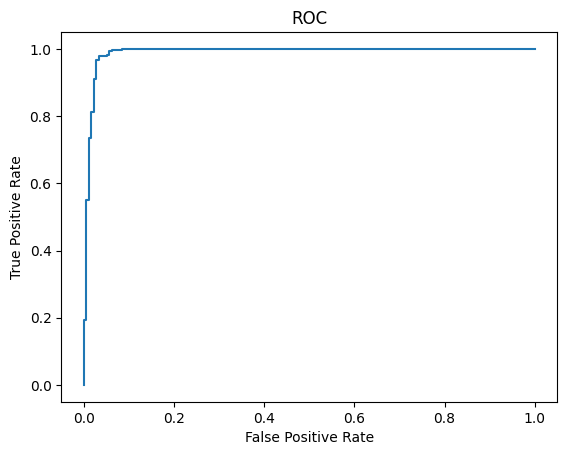

In [44]:
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[ 168   10]
 [  13 1202]]


In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm5 = confusion_matrix(Y_test, y_pred1)
print(cm5)

[[ 155   23]
 [   2 1213]]


In [47]:
print(df_sms)

     label                                                sms  Labeling  \
0      ham  Go until jurong point, crazy.. Available only ...         1   
1      ham                      Ok lar... Joking wif u oni...         1   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...         0   
3      ham  U dun say so early hor... U c already then say...         1   
4      ham  Nah I don't think he goes to usf, he lives aro...         1   
...    ...                                                ...       ...   
5567  spam  This is the 2nd time we have tried 2 contact u...         0   
5568   ham              Will Ì_ b going to esplanade fr home?         1   
5569   ham  Pity, * was in mood for that. So...any other s...         1   
5570   ham  The guy did some bitching but I acted like i'd...         1   
5571   ham                         Rofl. Its true to its name         1   

      length  
0        111  
1         29  
2        155  
3         49  
4         61  
...      

In [48]:
output_column=df_sms.columns.values.tolist()
print(output_column)

['label', 'sms', 'Labeling', 'length']


In [49]:
wb=openpyxl.Workbook()
s1=wb.active

s1['A1']=output_column[1]
s1['B1']='posterior probability'
s1['C1']='class'
wb.save('outputspam.xlsx')

In [50]:
traintotal=X_traino.shape[0]

yp=[]
xp=[]
nclass=0
total=0
workbook=openpyxl.load_workbook('outputspam.xlsx')
sheet=workbook.active

for i in range(traintotal):
    if(Y_trainlist[i]==nclass):
        total+=1
        yp.append(y_predprobatrain[i,nclass])
        xp.append(X_trainlist[i])

testtotal=X_testo.shape[0]


for i in range(testtotal):
    if(Y_testlist[i]==nclass):
        total+=1
        yp.append(y_pred_prob[i,nclass])
        xp.append(X_testlist[i])
        
C=75
ci_upper=np.percentile(yp,100-(100-C)*0.5)
ci_lower=np.percentile(yp,(100-C)*0.5)

j=2
for k in range(len(yp)):
    if(ci_lower<=yp[k]<=ci_upper):
        sheet.cell(j,1).value=xp[k]
        sheet.cell(j,2).value=yp[k]
        sheet.cell(j,3).value=nclass
        j+=1
        
workbook.save('outputspam.xlsx')
print(total)

747


word cloud for ham messages 

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc
fpr2, tpr2, thresholds2 = roc_curve(Y_test, y_pred1)
print(fpr2)
print(tpr2)
print(thresholds2)

[0.         0.12921348 1.        ]
[0.         0.99835391 1.        ]
[2 1 0]


In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', n_estimators=1000,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=42,n_jobs=-1)
rf.fit(X_train_transformed,Y_train)
rf_test_pred = rf.predict(X_test_transformed)

cm6=confusion_matrix(Y_test,rf_test_pred)
print(cm6)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[ 151   27]
 [   3 1212]]


In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc
fpr6, tpr6, thresholds6 = roc_curve(Y_test, rf_test_pred)
print(fpr6)
print(tpr6)
print(thresholds6)

[0.         0.15168539 1.        ]
[0.         0.99753086 1.        ]
[2 1 0]


In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(precision_score(Y_test,rf_test_pred))
print()
print(recall_score(Y_test,rf_test_pred))
print()
print(f1_score(Y_test,rf_test_pred))
print()

0.9782082324455206

0.9975308641975309

0.9877750611246945

